# Artificial Neural Network - Combined Cycle Power Plant

### Description: 
This dataset consists of below attributes. Need to create a model which will predict net hourly electrical energy output. By looking into the dataset, it can be said that linear regression need to be applied as : EP = a + b1.T + b2.AP + b3.RH + b4.V + e

#### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

## Part-1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Part-2: Pre-processing the data

#### Reading/Importing the file

In [2]:
df = pd.read_excel('C:\Users\rakes\Documents\Deep_Learning\Practise\ANN\Artificial_Neural_Network\Final Folder\Dataset\Power_plant.xlsx')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-a36a9af8b243>, line 1)

#### Error Solution:
1: Just put r before your normal string it converts normal string to raw string: pandas.read_csv(r"C:\Users\DeePak\Desktop\myac.csv")

2: pandas.read_csv("C:/Users/DeePak/Desktop/myac.csv")

3: pandas.read_csv("C:\\Users\\DeePak\\Desktop\\myac.csv")


In [3]:
df = pd.read_excel(r'C:\Users\rakes\Documents\Deep_Learning\Practise\ANN\Artificial_Neural_Network\Final Folder\Dataset\Power_plant.xlsx')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [19]:
df.shape

(9568, 5)

#### DataTypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.value_counts()

AT     V      AP       RH     PE    
7.87   41.17  1020.33  77.77  486.20    2
27.64  75.60  1017.35  54.78  441.04    2
8.57   41.17  1020.18  72.47  484.20    2
9.54   41.17  1019.79  65.61  481.18    2
25.79  75.60  1017.46  75.63  434.65    2
                                       ..
15.42  40.56  1021.23  59.37  469.33    1
15.43  38.58  1016.58  81.17  463.44    1
       39.16  1016.44  79.80  470.74    1
       39.64  1008.58  87.99  464.05    1
37.11  68.94  1006.23  31.15  429.25    1
Length: 9527, dtype: int64

In [28]:
##remove duplicate values
df.duplicated().any()

True

In [29]:
df.duplicated().sum()

41

In [30]:
df[df.duplicated()]

,AT,V,AP,RH,PE
2184,9.54,41.17,1019.79,65.61,481.18
2421,12.11,41.17,1019.46,62.59,475.53
2577,28.84,75.60,1018.41,53.96,442.69
2896,27.54,75.60,1018.26,57.89,440.87
3314,8.07,41.17,1019.40,86.43,484.54
4236,25.79,75.60,1017.46,75.63,434.65
4549,11.23,41.17,1019.36,56.85,475.85
4577,24.63,59.57,1010.45,85.36,440.67
4667,25.21,75.60,1017.19,69.84,445.84
5276,25.56,75.60,1017.37,69.31,442.20


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(9527, 5)

In [36]:
df.describe()

,AT,V,AP,RH,PE
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


#### Checking Missing Values

In [10]:
df.isna().any()

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool

#### Univariate Analysis

C:\Users\rakes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:464: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


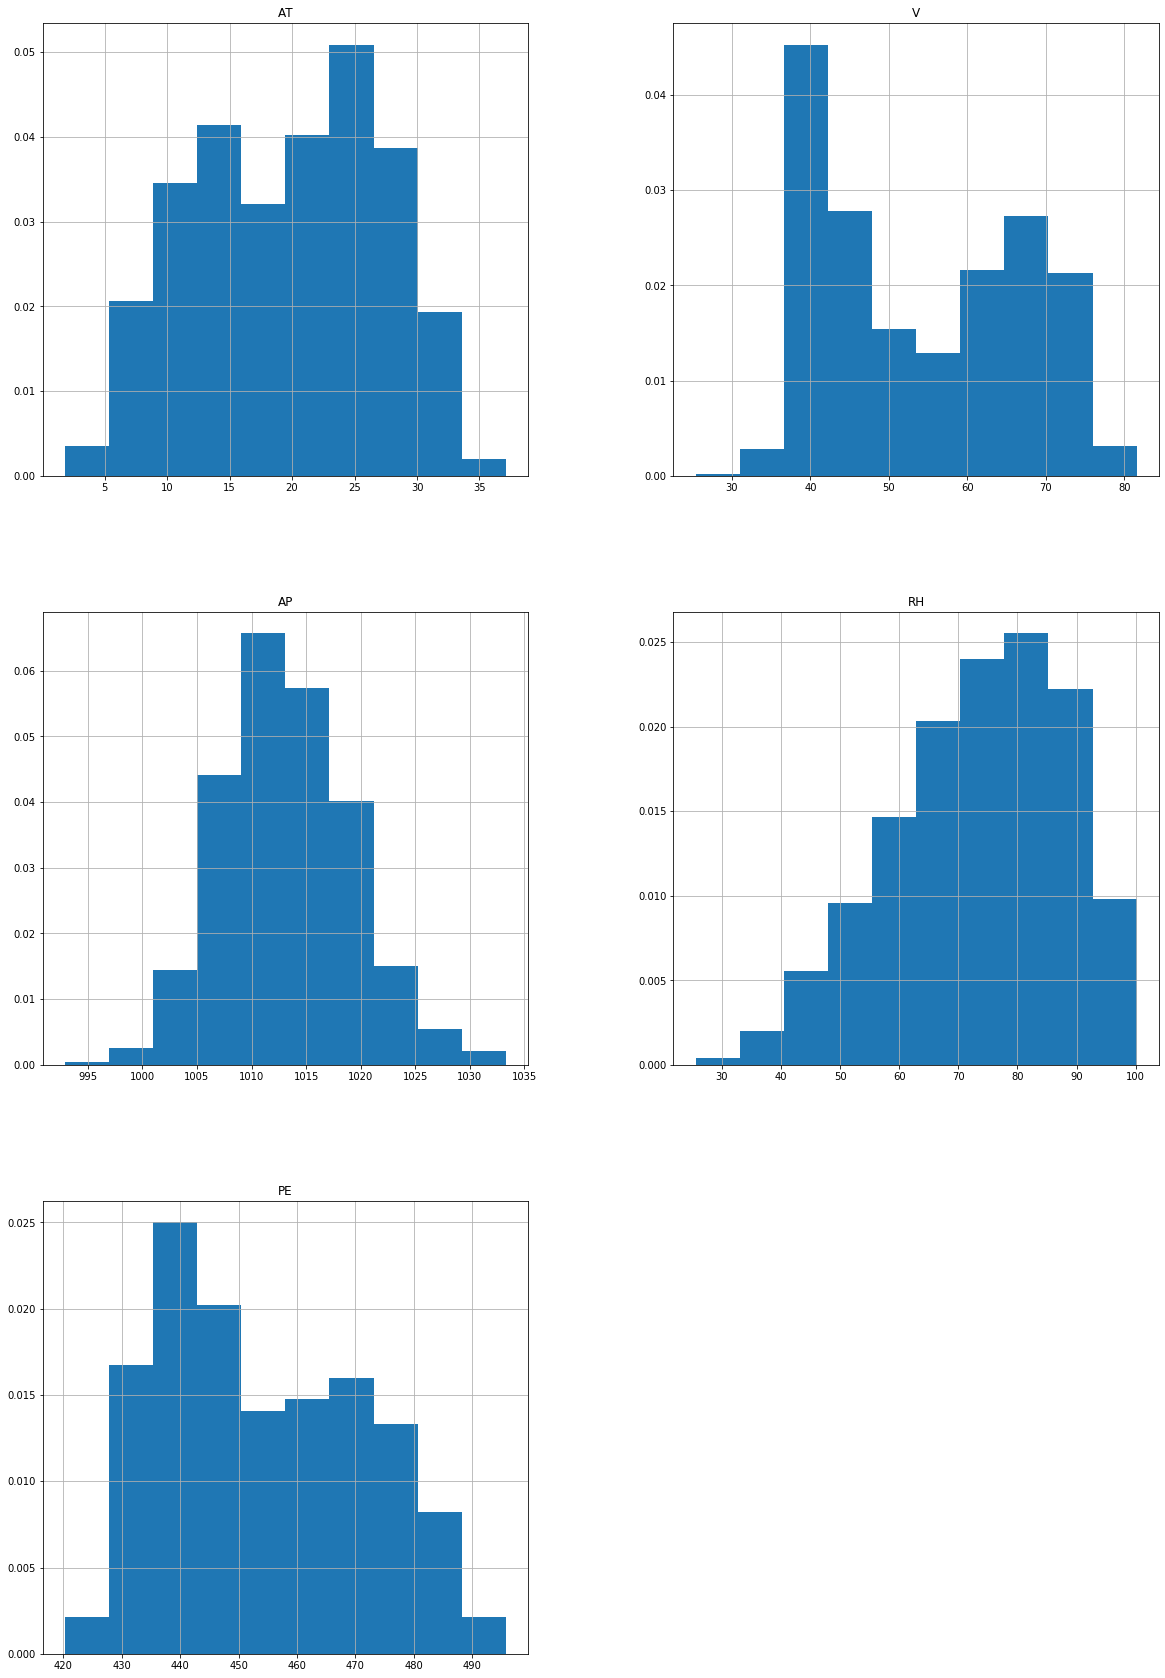

In [37]:
df.hist(figsize = (20,30),normed = True) #summary of distribution for relevant variables
plt.show()

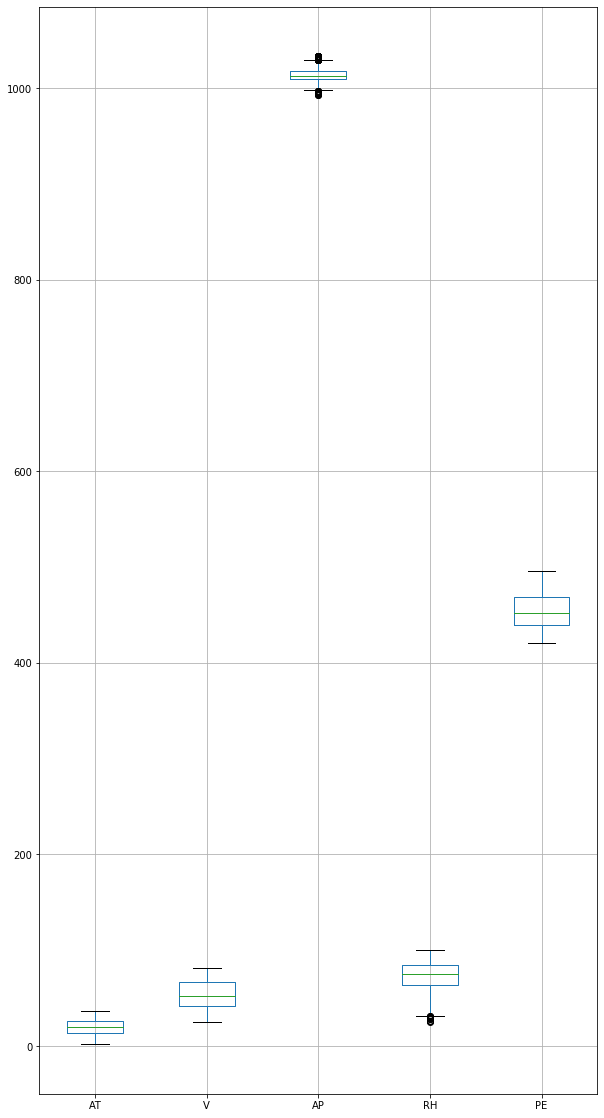

In [38]:
df.boxplot(figsize = (10,20)) #summary of distribution for relevant variables
plt.show()

#### Splitting the Dataframe into independent and dependent variables

In [40]:
X = df.iloc[:,:-1].values
print(X)
Y = df.iloc[:,-1].values
print(Y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


#### Splitting the data into training and test set

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Part-3: Building the ANN

#### Initialize the ANN

In [44]:
ann = tf.keras.models.Sequential()

#### Add input layer and 1st hidden layer

In [45]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### Add 2nd hidden layer

In [46]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### Add output layer

In [47]:
ann.add(tf.keras.layers.Dense(units=1))

## Part-4: Training the ANN

#### Compiling the ANN

In [48]:
ann.compile(optimizer = 'adam',loss='mean_squared_error')

#### Training the model on training set

In [50]:
ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
239/239 [==============================] - 2s 3ms/step - loss: 79884.3594
Epoch 2/100
239/239 [==============================] - 1s 2ms/step - loss: 885.0423
Epoch 3/100
239/239 [==============================] - 1s 2ms/step - loss: 342.8344
Epoch 4/100
239/239 [==============================] - 1s 2ms/step - loss: 336.6585
Epoch 5/100
239/239 [==============================] - 1s 2ms/step - loss: 329.0771
Epoch 6/100
239/239 [==============================] - 1s 2ms/step - loss: 320.2676
Epoch 7/100
239/239 [==============================] - 1s 2ms/step - loss: 310.5198
Epoch 8/100
239/239 [==============================] - 0s 2ms/step - loss: 299.0764
Epoch 9/100
239/239 [==============================] - 1s 2ms/step - loss: 286.8826
Epoch 10/100
239/239 [==============================] - 1s 2ms/step - loss: 274.1669
Epoch 11/100
239/239 [==============================] - 1s 2ms/step - loss: 260.4263
Epoch 12/100
239/239 [==============================] - 1s 2ms/step - lo

239/239 [==============================] - 1s 2ms/step - loss: 26.2141
Epoch 99/100
239/239 [==============================] - 1s 2ms/step - loss: 26.1908
Epoch 100/100
239/239 [==============================] - 1s 2ms/step - loss: 26.0975


In [51]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [53]:
ann.evaluate(X_train)

239/239 [==============================] - 1s 2ms/step - loss: 0.0000e+00


0.0

In [56]:
Y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_test.reshape(len(Y_test),1),Y_pred.reshape(len(Y_pred),1)),1))

[[488.81 478.46]
 [464.41 464.25]
 [454.66 461.94]
 ...
 [428.   433.56]
 [430.5  433.31]
 [482.31 472.7 ]]


### Summary:
Model is predicting values almost equal to Y_test.